
INF200 Lecture No 7
===================

***Hans Ekkehard Plesser, NMBU, 24 October 2022***

# Today's topics

* Towards object-oriented programming
    * From script to class: brief recap of Lecture 6
    * Implementing all parts of C&L simulation as classes
    * Implementing varied behavior through inheritance

-------

# Towards object-oriented programming

## Recap from Lecture 6

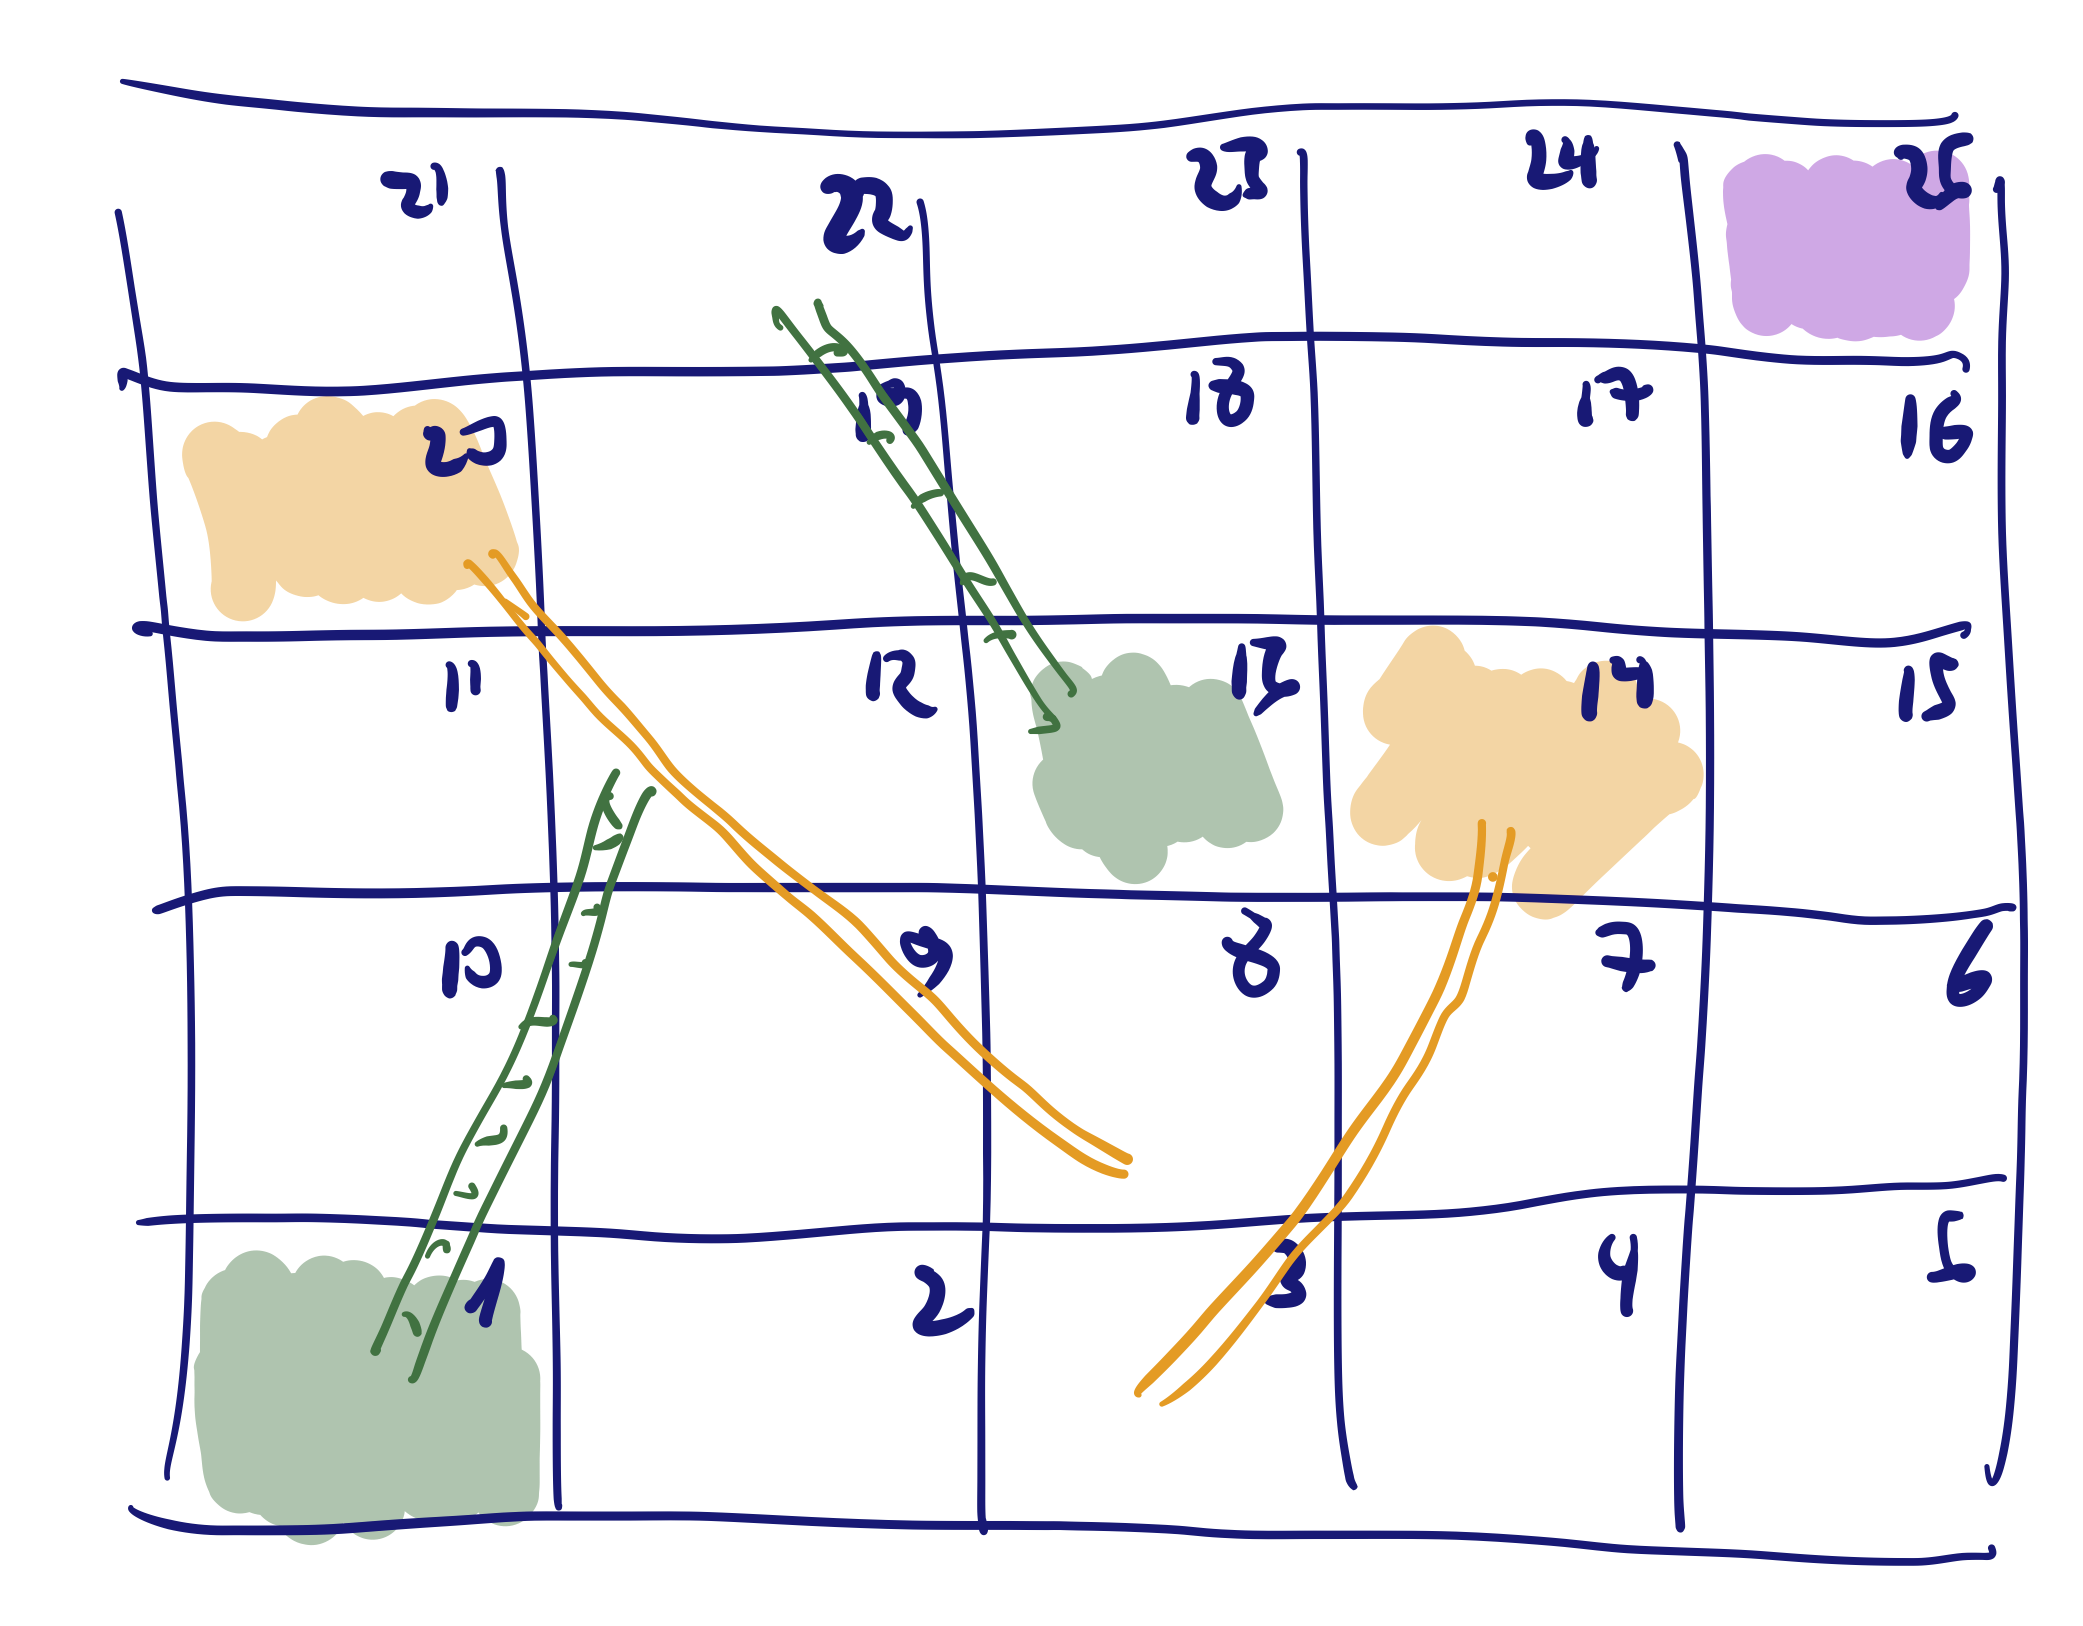


### Starting point: poorly written procedural code

Shortest game duration:    3
Mean game duration    :    8.0 ± 3.7
Longest game duration :   28


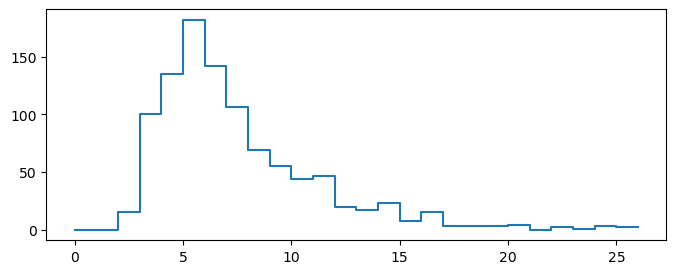

In [1]:
# %load ../l06/chutes_initial.py
import random
import matplotlib.pyplot as plt
import numpy as np

r = []

for _ in range(1000):
    s = 0
    p = 0
    while p < 25:
        p += random.randint(1, 6)
        if p == 1:
            p = 12
        elif p == 13:
            p = 22
        elif p == 14:
            p = 3
        elif p == 20:
            p = 8
        s += 1
    r.append(s)

print(f'Shortest game duration: {min(r):4d}')
print(f'Mean game duration    : {np.mean(r):6.1f} ± {np.std(r):.1f}')
print(f'Longest game duration : {max(r):4d}')

hv, hb = np.histogram(r, bins=np.arange(0, max(r)))
plt.figure(figsize=(8, 3))
plt.step(hb[:-1], hv)
plt.show()


### First improvement: Separation of concerns

- Divide code into parts (functions) with specific tasks
- Named units make for more expressive code
- Smaller units are easier to maintain
- We can reason about and test every part separately
- Remember: We write code for humans, not for computers!
- File: `l06/chutes_with_functions.py`

### Second improvement: Represent player as record

- Collect all information about a player in a record
- Fewer individual pieces of data to pass around
- Easier to add more information about a player: requires changes only in code working "inside" the record
- Allows for compact and expressive code

```python
    player = {'position': 0, 'num_moves': 0}
    while player['position'] < board['goal']:
        make_move(player, board)
    return player['num_moves']
```

- File: `l06/chutes_with_records.py`

### Third improvement: Represent player as class

- Combine data (record) and operations on data (functions) into a class
- All now "in one place"
- Even more compact and expressive code

```python
    player = Player(board)
    while player.position < board['goal']:
        player.make_move()
    return player.num_moves
```

- Code using `Player` can ignore all internal details of `Player` implementation
- File: `l06/chutes_with_class.py`

### Comparison: Record-based vs class-based implementation

- `self` represents instance (essentially the dictionary or record)
- field access via `.name` instead of `["name"]`
- method (function in class) automatically gets access to `self`
- instance is created by `__init__()` when calling `Player()`

#### Record-based

```python
def make_move(player, board):
    player['position'] += random.randint(1, 6)
    if player['position'] in board['chutes_and_ladders']:
        player['position'] = board['chutes_and_ladders'][player['position']]
    player['num_moves'] += 1

def one_game(board):
    player = {'position': 0, 'num_moves': 0}
    while player['position'] < board['goal']:
        make_move(player, board)
    return player['num_moves']
```

#### Class-based

```python
class Player:
    def __init__(self, board):
        self.board = board
        self.position = 0
        self.num_moves = 0

    def make_move(self):
        self.position += random.randint(1, 6)
        if self.position in board['chutes_and_ladders']:
            self.position = board['chutes_and_ladders'][self.position]
        self.num_moves += 1

def one_game(board):
    player = Player(board)
    while player.position < board['goal']:
        player.make_move()
    return player.num_moves
```

### What are benefits of using a class?

- Record-based solution keeps data together, but
    - records need to be moved around
    - code handling records can be spread
    - code handling one part of the problem can be spread
- Key idea in object-oriented programming
    - Collect data describing a given part of a problem and operations on this data into one unit.
    - This unit is a *class*: A description of data *fields* and *methods* (functions) to work on them.
    - Can be thought of as "dictionary with custom functions"
        - e.g. player "dictionary" with a move function working on the dict
    - A class is a data type: it defines rules 
    - Acutal records are called *instances* (or *objects*)
- Keeping control
    - Create each instance in a consistent state
    - Each method
        - relies on instance being in a consistent state when it starts
        - guarantees that instant is in a consistent state when it finishes
    - We can check every method on its own!

---

## Implementing all parts of Chutes & Ladders as classes

- Create a class for each concept with a field for relevant data
    - Player
        - Fields (data)
            - position
            - number of moves so far
            - board on which player "lives"
        - Methods (operations)
            - move
    - Board
        - Fields
            - chutes and ladders
            - goal position
        - Methods
            - tell if goal reached
            - give correct new position if player landed on chute/ladder
    - Game
        - Fields
            - board
            - players in the game
        - Methods
            - play the game
    - Experiment
        - Fields
            - random seed
            - number of players
            - game board
            - number of games to play
            - simulation results
        - Methods
            - run all games
            
- Design decision: How to we implement the relation between players and board?

- Live programming in PyCharm

---
## Implementing varied behavior

- We will live-code in PyCharm

### Multiple players

- An flexible solution for any number of players

### Flexible board specifications
    
- Flexible goal location
- Flexible chutes and ladders
- Board specifications from file

### Different board types 
- Blocking goal (must hit goal exactly, else stay in place)
- Reflecting goal (move all eyes rolled, turning around at goal if necessary)